In [119]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [102]:
pip install pandas
import pandas as pd

In [152]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contains 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
    df = pd.read_csv(filename)
    labels = np.array(df['label'])
    df.drop('label', axis =1, inplace = True)
    return np.array(df).reshape(len(df),28,28), labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [153]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

training_images = np.expand_dims(training_images,axis=-1)
testing_images = np.expand_dims(testing_images,axis=-1)

# Create an ImageDataGenerator and do Image Augmentation
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

validation_datagen = ImageDataGenerator(
    rescale = 1./255)

train_generator = training_datagen.flow(
    training_images,
    training_labels,
    batch_size = 32
)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [161]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
])
# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_generator, epochs=10, validation_data = validation_generator)

model.evaluate(testing_images, testing_labels)

Epoch 1/10
858/858 [==============================] - 61s 71ms/step - loss: 2.6931 - accuracy: 0.1808 - val_loss: 1.8636 - val_accuracy: 0.3885
Epoch 2/10
858/858 [==============================] - 60s 70ms/step - loss: 1.9461 - accuracy: 0.3833 - val_loss: 1.1258 - val_accuracy: 0.5803
Epoch 3/10
858/858 [==============================] - 61s 71ms/step - loss: 1.5097 - accuracy: 0.5085 - val_loss: 1.0006 - val_accuracy: 0.6279
Epoch 4/10
858/858 [==============================] - 61s 71ms/step - loss: 1.2108 - accuracy: 0.6014 - val_loss: 0.7010 - val_accuracy: 0.7546
Epoch 5/10
858/858 [==============================] - 60s 70ms/step - loss: 1.0062 - accuracy: 0.6680 - val_loss: 0.4625 - val_accuracy: 0.8370
Epoch 6/10
858/858 [==============================] - 61s 71ms/step - loss: 0.8626 - accuracy: 0.7108 - val_loss: 0.4039 - val_accuracy: 0.8574
Epoch 7/10
858/858 [==============================] - 62s 73ms/step - loss: 0.7573 - accuracy: 0.7493 - val_loss: 0.3221 - val_accuracy:

[171.04464078308547, 0.71402675]

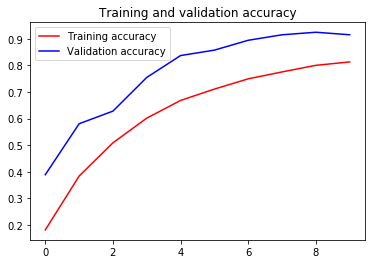

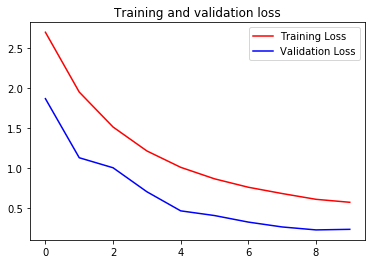

In [162]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Submission Instructions

In [ ]:
# Now click the 'Submit Assignment' button above.

# When you're done or would like to take a break, please run the two cells below to save your work and close the Notebook. This will free up resources for your fellow learners. 

In [ ]:
%%javascript
<!-- Save the notebook -->
IPython.notebook.save_checkpoint();

In [ ]:
%%javascript
IPython.notebook.session.delete();
window.onbeforeunload = null
setTimeout(function() { window.close(); }, 1000);